# PAC vs PIC
PAC: Piano di Accumulo Capitale \
PIC: Piano di Investimento Capitale

Basato su: [Paolo Coletti, Il PAC conviene?](https://www.youtube.com/watch?v=ZPQGcJ1B8Bg&pp=ygUSY29sZXR0aSBQQUMgdnMgUElD)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style("whitegrid")
# sns.set_theme()
matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]

## Download degli indici

In [58]:
msci_world_url = "https://github.com/paolocole/Stock-Indexes-Historical-Data/raw/refs/heads/main/NET/USD/LARGE_AND_MID_CAP/REGIONS/MSCI%20WORLD.csv"
df = pd.read_csv(msci_world_url, index_col="Date", parse_dates=True)
# df = df[df.index >= datetime.datetime(1999, 1, 1)]

In [59]:
df = df.rename(columns={"WORLD": "MSCI WORLD"})
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 644 entries, 1969-12-01 to 2023-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MSCI WORLD  644 non-null    float64
dtypes: float64(1)
memory usage: 10.1 KB


,MSCI WORLD
Date,
1969-12-01,100.000
1970-01-01,94.455
1970-02-01,97.405
1970-03-01,97.708
1970-04-01,88.578


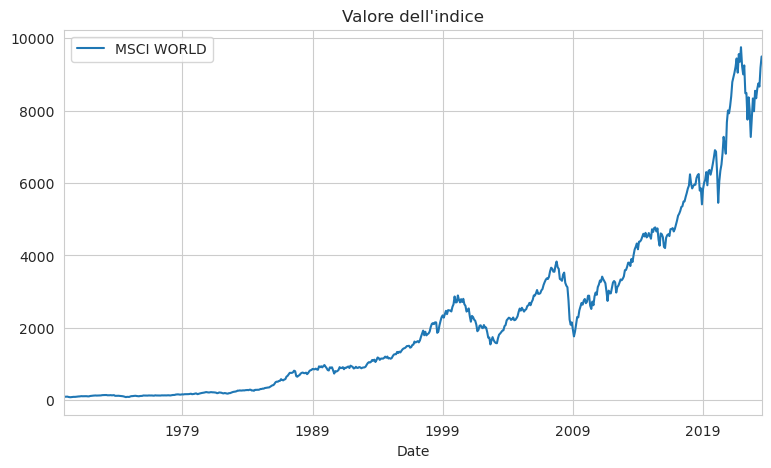

In [60]:
df.plot(title="Valore dell'indice");

## Parametri

In [61]:
anni = 3
capitale = 10000

## Simulazioni

### PIC

In [72]:
pic = pd.DataFrame()
pic["RTOT"] = (df["MSCI WORLD"].shift(-anni*12) / df["MSCI WORLD"]) - 1
pic["VEND"] = capitale * pic["RTOT"]

pic = pic.dropna()
pic.info()
pic.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 608 entries, 1969-12-01 to 2020-07-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RTOT    608 non-null    float64
 1   VEND    608 non-null    float64
dtypes: float64(2)
memory usage: 14.2 KB


,RTOT,VEND
Date,,
1969-12-01,0.405030,4050.300000
1970-01-01,0.490932,4909.321899
1970-02-01,0.455767,4557.671577
1970-03-01,0.453279,4532.791583
1970-04-01,0.522297,5222.967328


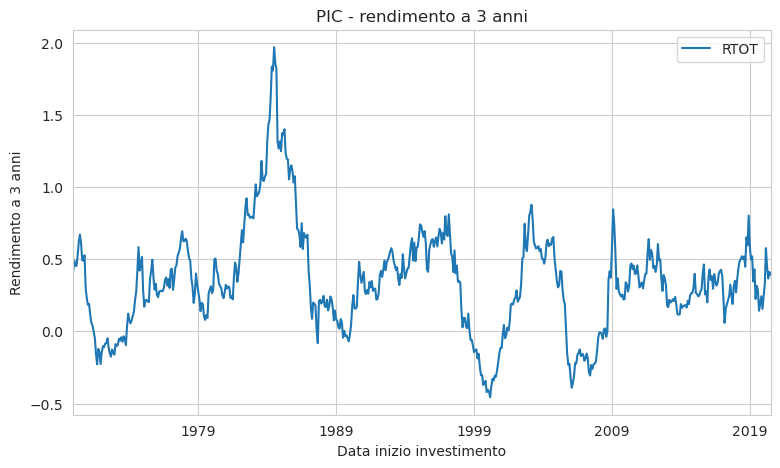

In [63]:
pic.plot(y="RTOT",
    title=f"PIC - rendimento a {anni} anni",
    xlabel="Data inizio investimento",
    ylabel=f"Rendimento a {anni} anni");

### PAC

In [64]:
inv_m = capitale / anni / 12

In [65]:
n = df.shape[0]
m = 12*anni
valore_m = np.full(shape=(n, m), fill_value=np.nan)

valore_m[:, 0] = np.array(df["MSCI WORLD"])
for i in range(1, m):
    valore_m[:, i] = np.array(df["MSCI WORLD"].shift(-i))

quote_m = inv_m / valore_m
quote_end = np.sum(quote_m, axis=1)
valore_end = quote_end * valore_m[:,-1]
pac = pd.DataFrame(valore_end, index=df.index, columns=['VEND'])
pac["RTOT"] = (pac["VEND"]/capitale - 1)
pac = pac.dropna()

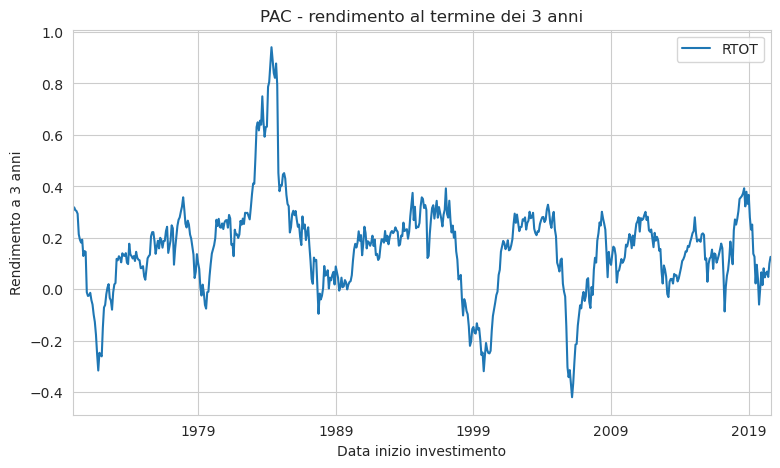

In [66]:
pac.plot(y="RTOT", 
    title=f"PAC - rendimento al termine dei {anni} anni",
    xlabel="Data inizio investimento",
    ylabel=f"Rendimento a {anni} anni");

## Confronto

In [71]:
sim = pic.join(pac, lsuffix='_PIC', rsuffix='_PAC')
sim["RTOT_DIFF"]  = sim["RTOT_PIC"] - sim["RTOT_PAC"]
sim.head()

,RTOT_PIC,VEND_PIC,VEND_PAC,RTOT_PAC,RTOT_DIFF
Date,,,,,
1969-12-01,0.405030,4050.300000,13058.882282,0.305888,0.099142
1970-01-01,0.490932,4909.321899,13185.640877,0.318564,0.172368
1970-02-01,0.455767,4557.671577,13079.583074,0.307958,0.147809
1970-03-01,0.453279,4532.791583,13043.351005,0.304335,0.148944
1970-04-01,0.522297,5222.967328,12935.653116,0.293565,0.228731


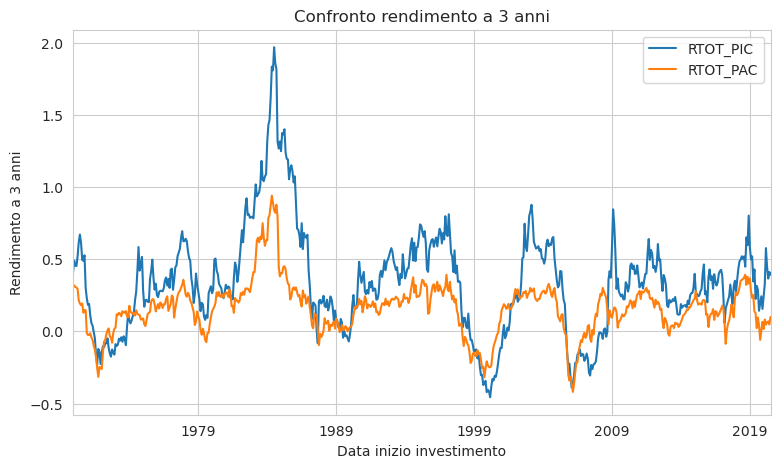

In [68]:
sim.plot(y=["RTOT_PIC", "RTOT_PAC"], 
    title=f"Confronto rendimento a {anni} anni",
    xlabel="Data inizio investimento",
    ylabel=f"Rendimento a {anni} anni");

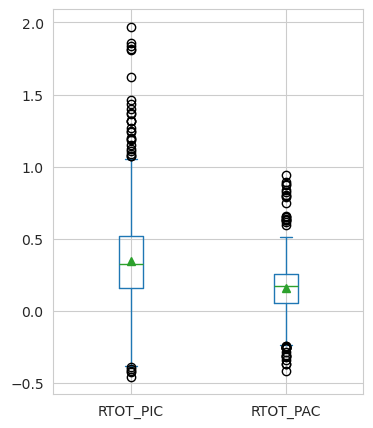

In [69]:
sim.plot(kind="box", y=["RTOT_PIC", "RTOT_PAC"], showmeans=True, 
    figsize=(4, 5));

In [70]:
sim[["RTOT_PIC", "RTOT_PAC"]].describe()

,RTOT_PIC,RTOT_PAC
count,608.000000,608.000000
mean,0.343222,0.157859
std,0.363288,0.182499
min,-0.456299,-0.418984
25%,0.158346,0.055836
50%,0.321856,0.170817
75%,0.519561,0.252825
max,1.969382,0.940641
